In [1]:
pip install healpy astropy matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_35/688703875.py:9: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(map_path, field=0, verbose=False)


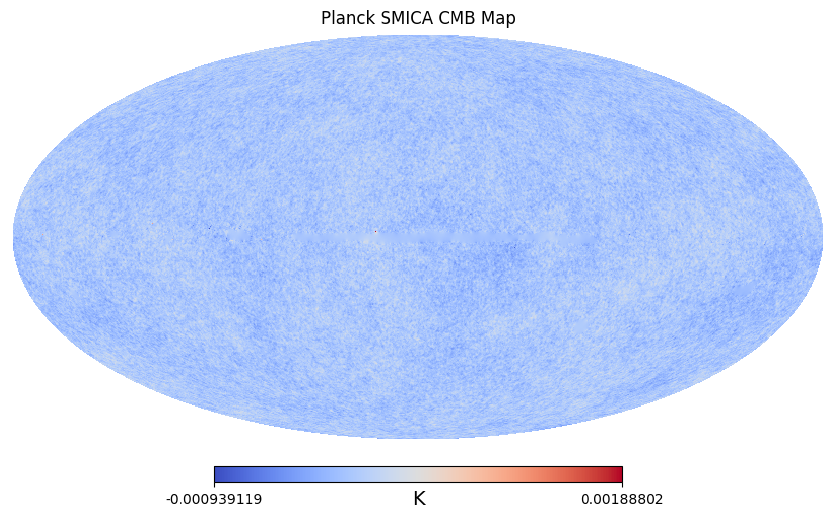

In [3]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

# File path to your downloaded SMICA map
map_path = "/kaggle/input/smica-planck/COM_CMB_IQU-smica_2048_R3.00_full.fits"

# Read the temperature map (field=0)
cmb_map = hp.read_map(map_path, field=0, verbose=False)

# Visualize the full sky using Mollweide projection
hp.mollview(cmb_map, title="Planck SMICA CMB Map", unit="K", cmap="coolwarm")
plt.show()


> **Basic Statistics of the Map**

In [4]:
mean_temp = np.mean(cmb_map)
std_temp = np.std(cmb_map)
min_temp = np.min(cmb_map)
max_temp = np.max(cmb_map)

print(f"Mean Temperature: {mean_temp:.4e} K")
print(f"Standard Deviation: {std_temp:.4e} K")
print(f"Min: {min_temp:.4e} K, Max: {max_temp:.4e} K")

Mean Temperature: -2.4632e-13 K
Standard Deviation: 1.0837e-04 K
Min: -5.7550e-03 K, Max: 7.8988e-03 K


> **Cold Spot location in Galactic coordinates**

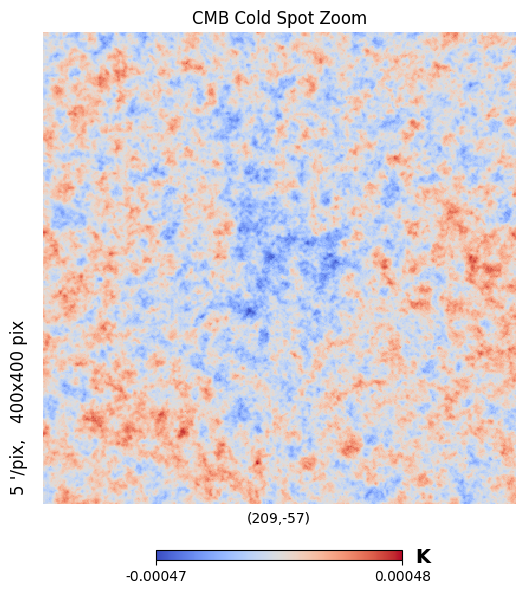

In [5]:
# Cold Spot location in Galactic coordinates
lon, lat = 209, -57 

hp.gnomview(cmb_map, rot=(lon, lat), reso=5.0, xsize=400, title="CMB Cold Spot Zoom", unit="K", cmap="coolwarm")
plt.show()

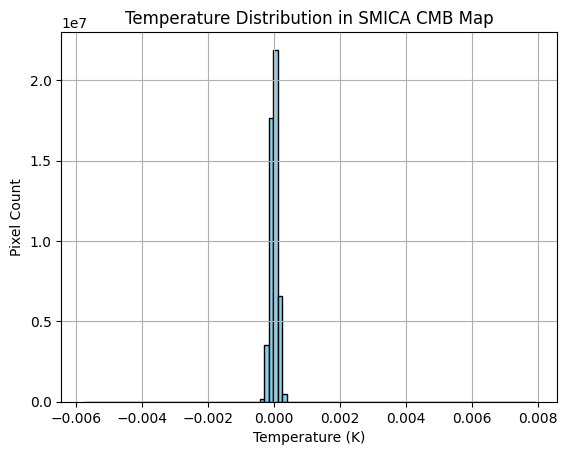

In [6]:
plt.hist(cmb_map, bins=100, color='skyblue', edgecolor='black')
plt.title("Temperature Distribution in SMICA CMB Map")
plt.xlabel("Temperature (K)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()

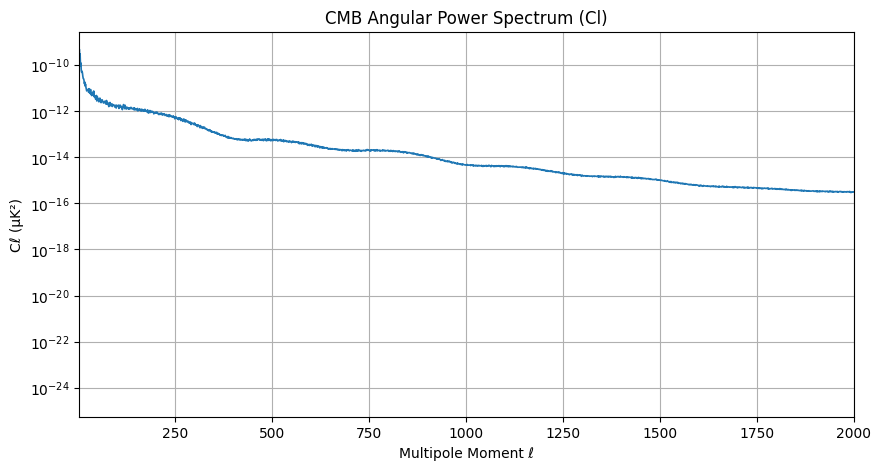

In [7]:
cl = hp.anafast(cmb_map)
ell = np.arange(len(cl))

plt.figure(figsize=(10, 5))
plt.plot(ell, cl, lw=1.2)
plt.title("CMB Angular Power Spectrum (Cl)")
plt.xlabel("Multipole Moment ℓ")
plt.ylabel("Cℓ (μK²)")
plt.yscale("log")
plt.grid(True)
plt.xlim([2, 2000])
plt.show()